In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
listings = pd.read_csv('~/studies/analytics/listings.csv')

In [3]:
listings.shape
original = listings.copy()

#### Lösche alle Spalten in denen alle Werte gleich sind, bzw. die keine Werte haben.

In [4]:
for column in listings.columns:
    if listings[column].nunique() <= 1:
        listings = listings.drop(columns=column)
listings.shape

(24422, 97)

#### Alle Spalten und die Anzahl der verschiedenen Werte anzeigen

In [5]:
for column in listings.columns:
    print(column + ' ' + str(listings[column].nunique()))

id 24422
listing_url 24422
last_scraped 2
name 23722
summary 22480
space 15160
description 23556
neighborhood_overview 12462
notes 7119
transit 13945
access 10193
interaction 11011
house_rules 10991
picture_url 24164
host_id 20413
host_url 20413
host_name 6369
host_since 3215
host_location 1079
host_about 9369
host_response_time 4
host_response_rate 76
host_is_superhost 2
host_thumbnail_url 20314
host_picture_url 20314
host_neighbourhood 190
host_listings_count 44
host_total_listings_count 44
host_verifications 333
host_has_profile_pic 2
host_identity_verified 2
street 94
neighbourhood 93
neighbourhood_cleansed 138
neighbourhood_group_cleansed 12
city 64
state 28
zipcode 216
market 7
smart_location 66
country_code 2
country 2
latitude 10256
longitude 13643
is_location_exact 2
property_type 33
room_type 4
accommodates 16
bathrooms 18
bedrooms 12
beds 21
bed_type 5
amenities 21688
square_feet 113
price 335
weekly_price 372
monthly_price 396
security_deposit 164
cleaning_fee 126
guests_in

#### Alle Spalten mit 2 verschiedenen Werten zur näheren Betrachtung.

In [6]:
for column in listings.columns:
    if listings[column].nunique() == 2:
        print(column + ' ' + str(listings[column].nunique()))
        print(listings[column])

last_scraped 2
0        2019-09-19
1        2019-09-19
2        2019-09-19
3        2019-09-19
4        2019-09-19
            ...    
24417    2019-09-19
24418    2019-09-19
24419    2019-09-19
24420    2019-09-19
24421    2019-09-19
Name: last_scraped, Length: 24422, dtype: object
host_is_superhost 2
0        f
1        t
2        f
3        f
4        f
        ..
24417    f
24418    f
24419    f
24420    f
24421    t
Name: host_is_superhost, Length: 24422, dtype: object
host_has_profile_pic 2
0        t
1        t
2        t
3        t
4        t
        ..
24417    t
24418    t
24419    t
24420    t
24421    t
Name: host_has_profile_pic, Length: 24422, dtype: object
host_identity_verified 2
0        t
1        t
2        t
3        f
4        t
        ..
24417    f
24418    f
24419    f
24420    f
24421    t
Name: host_identity_verified, Length: 24422, dtype: object
country_code 2
0        DE
1        DE
2        DE
3        DE
4        DE
         ..
24417    DE
24418    DE
2441

In [7]:
listings.loc[listings['country_code'] == 'US']

,id,listing_url,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,...,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
20607,32920540,https://www.airbnb.com/rooms/32920540,2019-09-19,"Penthouse, Sauna, Panoramic Balcony, <3 of Berlin",Stay in this gorgeous luxury penthouse apartme...,"Modern design, cozy interior décor, luxury bui...",Stay in this gorgeous luxury penthouse apartme...,This is the center of all of Berlin.,Please do not take anything that does not belo...,NaN,...,NaN,t,strict_14_with_grace_period,f,f,2,0,2,0,4.05


#### Spalten entfernen (nach eigenem Ermessen)

In [8]:
listings = listings.drop(columns=["last_scraped", "country_code", "country", "calendar_last_scraped", "listing_url",
                                 "calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
                                 "calculated_host_listings_count_private_rooms",
                                 "calculated_host_listings_count_shared_rooms", "city", "state", "host_thumbnail_url",
                                 "host_picture_url", "host_url", "host_listings_count", "host_total_listings_count"])
listings.shape

(24422, 81)

### Nähere Betrachtungen
#### Preis bereinigen

In [9]:
def price_to_float(price):
    price = float(price.replace('$','').replace(',',''))
    return price

In [10]:
listings['price'] = listings['price'].map(price_to_float)
listings['price']

0         21.0
1         60.0
2         90.0
3         28.0
4        125.0
         ...  
24417     54.0
24418     60.0
24419     36.0
24420     50.0
24421     70.0
Name: price, Length: 24422, dtype: float64

#### 'calender_updated' in Tage (int) umrechnen.

In [11]:
def weeks_ago_to_days(weeks):
    if 'days' in weeks:
        weeks = int(weeks.replace(' days ago',''))
    elif 'weeks' in weeks:
        weeks = int(weeks.replace(' weeks ago','')) * 7
    elif 'months' in weeks:
        weeks = int(weeks.replace(' months ago','')) * 30
    elif weeks == 'today':
        weeks = 0
    elif weeks == 'yesterday':
        weeks = 1
    elif weeks == 'never':
        weeks = 10000
    elif weeks == 'a week ago' or weeks == '1 week ago':
        weeks = 7
    
        
    return weeks

In [12]:
listings['calendar_updated'] = listings['calendar_updated'].map(weeks_ago_to_days)
listings.calendar_updated

0        270
1         14
2        330
3          7
4          7
        ... 
24417      0
24418      0
24419      0
24420      0
24421      0
Name: calendar_updated, Length: 24422, dtype: int64

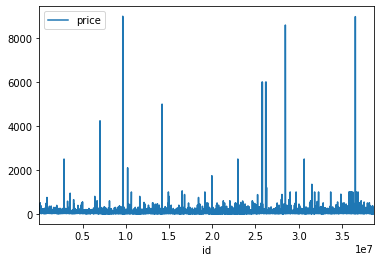

In [13]:
# cal = pd.DataFrame({'price': listings.price, 'updated':listings.calendar_updated})
price_ = listings.plot.line(x='id', y='price')

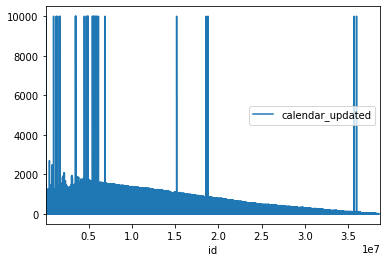

In [14]:
cal_ = listings.plot.line(x='id', y='calendar_updated')

#### Vergleiche Größe:Preis & Ausreißer Größe

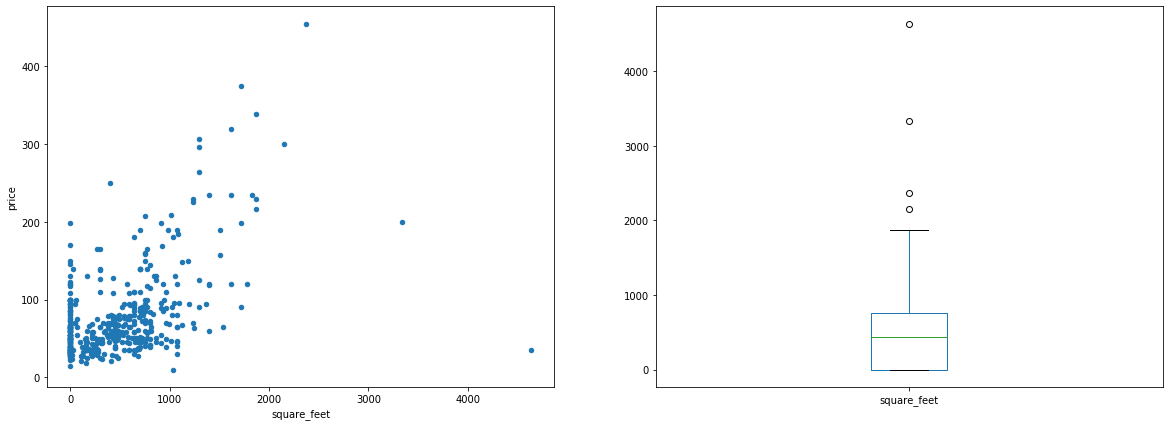

In [15]:
fig, axs = plt.subplots(1,2, figsize = (20,7))
price_sqf = listings.plot.scatter(x='square_feet', y='price', ax=axs[0])
price_sqf_box = listings.plot.box(x='price', y='square_feet', ax=axs[1])

#### Größenausreißer entfernen

In [16]:
listings.square_feet.isnull().sum(axis=0)

23992

In [17]:
listings = listings.drop(listings[listings.square_feet == 0].index)
listings = listings.drop(listings[listings.price == 0].index)
listings = listings.drop(listings[listings.square_feet.isnull()].index)
listings.shape

(314, 81)

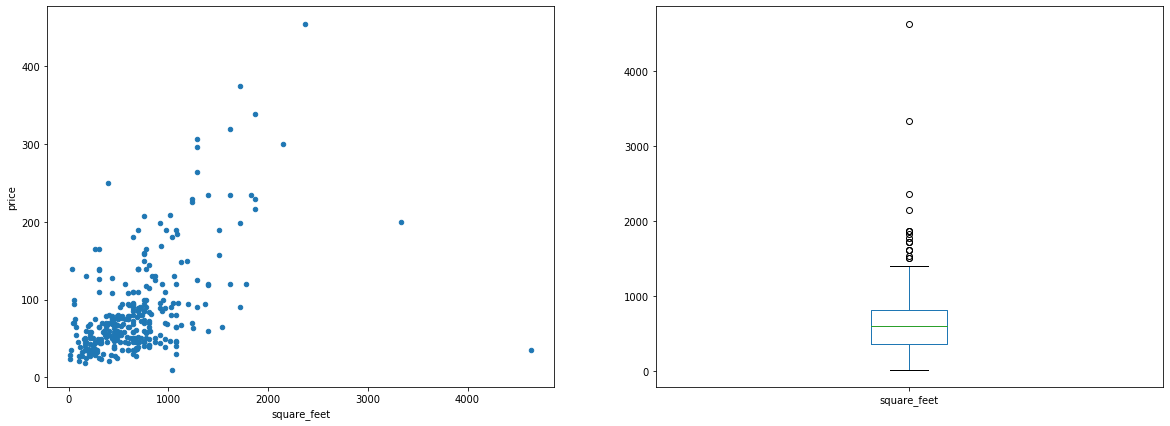

In [18]:
fig, axs = plt.subplots(1,2, figsize = (20,7))
price_sqf = listings.plot.scatter(x='square_feet', y='price', ax=axs[0])
price_sqf_box = listings.plot.box(x='price', y='square_feet', ax=axs[1])

In [19]:
def outlier(df, column):
    df[column] = df[column]._get_numeric_data()
    q1 = df[column].quantile(0.25)
    print(q1)
    q3 = df[column].quantile(0.75)
    print(q3)
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.drop(df[df[column] < lower_bound].index)
    df = df.drop(df[df[column] > upper_bound].index)
            
    
    return(df)

In [20]:
listings.square_feet

2         720.0
14        753.0
18       1012.0
26        646.0
30        215.0
          ...  
20794     323.0
20953     108.0
21480     431.0
21501     300.0
22347     990.0
Name: square_feet, Length: 314, dtype: float64

In [21]:
listings = outlier(listings, 'square_feet')
listings.shape

355.0
809.25


(296, 81)

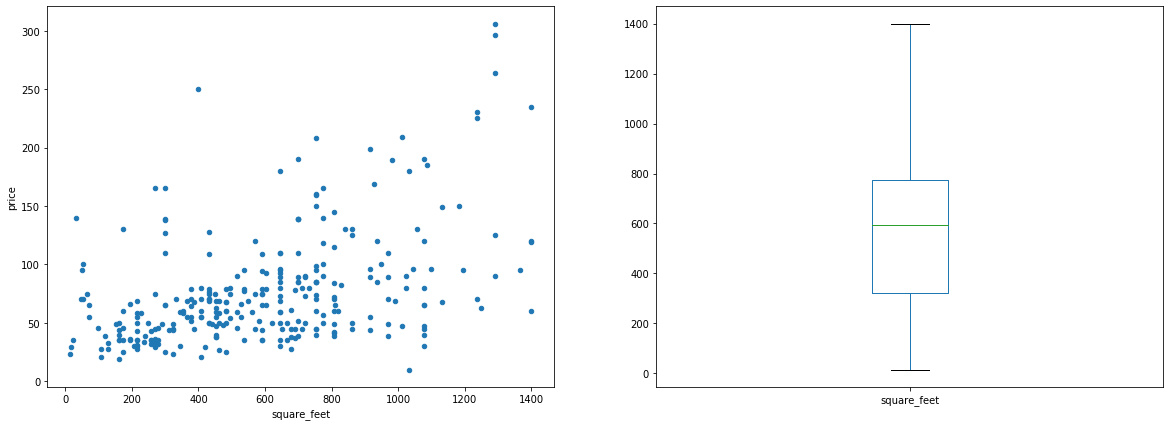

In [22]:
fig, axs = plt.subplots(1,2, figsize = (20,7))
price_sqf = listings.plot.scatter(x='square_feet', y='price', ax=axs[0])
price_sqf_box = listings.plot.box(x='price', y='square_feet', ax=axs[1])

In [23]:
listings.square_feet

2         720.0
14        753.0
18       1012.0
26        646.0
30        215.0
          ...  
20794     323.0
20953     108.0
21480     431.0
21501     300.0
22347     990.0
Name: square_feet, Length: 296, dtype: float64

In [24]:
square_fit = np.polyfit(listings.square_feet, listings.price, 1)
x = square_fit[0]
n = square_fit[1]
print(f"f(x) = {x} * x + {n}")

f(x) = 0.07008251341418208 * x + 35.35950324697031


In [26]:
original[['square_feet', 'property_type', 'room_type']].sample(20)

,square_feet,property_type,room_type
12943,NaN,Apartment,Private room
3885,NaN,Apartment,Entire home/apt
12953,NaN,Apartment,Private room
23843,NaN,Apartment,Private room
8546,NaN,Apartment,Private room
9916,NaN,Apartment,Entire home/apt
8490,NaN,Apartment,Entire home/apt
18471,NaN,House,Entire home/apt
6462,NaN,Apartment,Entire home/apt
2715,NaN,Apartment,Private room


In [31]:
100*original['property_type'].value_counts(normalize=True)

Apartment                 88.678241
Condominium                2.665629
House                      1.953157
Loft                       1.920400
Serviced apartment         1.289821
Hostel                     0.777987
Townhouse                  0.479076
Boutique hotel             0.360331
Hotel                      0.356236
Guest suite                0.290721
Guesthouse                 0.249775
Bed and breakfast          0.212923
Other                      0.139219
Bungalow                   0.102367
Houseboat                  0.069609
Boat                       0.069609
Villa                      0.069609
Tiny house                 0.049136
Aparthotel                 0.049136
Camper/RV                  0.040947
Cottage                    0.032757
Pension (South Korea)      0.032757
Cabin                      0.032757
Barn                       0.016379
Treehouse                  0.012284
Castle                     0.012284
Casa particular (Cuba)     0.008189
Resort                     0

In [33]:
100*original['property_type'].value_counts(normalize=True).cumsum()

Apartment                  88.678241
Condominium                91.343870
House                      93.297027
Loft                       95.217427
Serviced apartment         96.507248
Hostel                     97.285235
Townhouse                  97.764311
Boutique hotel             98.124642
Hotel                      98.480878
Guest suite                98.771599
Guesthouse                 99.021374
Bed and breakfast          99.234297
Other                      99.373516
Bungalow                   99.475882
Houseboat                  99.545492
Boat                       99.615101
Villa                      99.684711
Tiny house                 99.733847
Aparthotel                 99.782983
Camper/RV                  99.823929
Cottage                    99.856687
Pension (South Korea)      99.889444
Cabin                      99.922201
Barn                       99.938580
Treehouse                  99.950864
Castle                     99.963148
Casa particular (Cuba)     99.971337
R

In [28]:
original['room_type'].value_counts()

Entire home/apt    12136
Private room       11638
Hotel room           348
Shared room          300
Name: room_type, dtype: int64